# **CNN ON MNIST DATASET** <br/>
This dataset is avalilable on analytics Vidhya.
Train data consists of 49000 images and Test data contains 21000 images. Labels contain the corresponding labels for train data images.

In [1]:
from scipy import misc
import numpy as np
import os
import pandas as pd

from keras import backend as K
K.set_image_dim_ordering('th')


Using TensorFlow backend.


**Import** the labels of the training data and read the files in the training folder.

In [2]:
labels=pd.read_csv('C:/Users/GUS9KOR/Downloads/Train/train.csv')

samples=[]
folder='C:/Users/GUS9KOR/Downloads/Train/Images/train'
for filename in labels.filename.values:
        img = misc.imread(os.path.join(folder,filename),flatten=True)
        if img is not None:
            #img=img[:,:,0]
            img=img.reshape(-1)
            samples.append(img)
            
train=pd.DataFrame(samples).values.astype('float32')

**Now just to check if the images are correctly imported and reshaped, Plot the first 20 images **

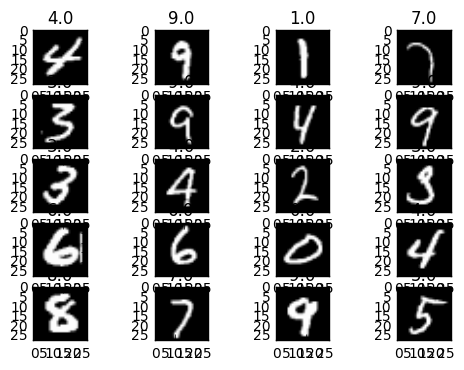

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
for i in range(20):
     plt.subplot(5,4,i+1)
     plt.title(labels.label[i])
     plt.imshow(samples[i].reshape(28,28),cmap='gray',interpolation=None)

**Read the Images in the test folder**

In [4]:
testsamples=[]
folder='C:/Users/GUS9KOR/Downloads/Train/Images/test'
for filename in os.listdir(folder):
        img = misc.imread(os.path.join(folder,filename),flatten=True)
        if img is not None:
            img=img.reshape(-1)
            testsamples.append(img)
test=pd.DataFrame(testsamples).values.astype('float32')

**Re-shape the train and test data for correct input to the CNN Model**

In [5]:
import keras.utils.np_utils as kutils

labels.drop('filename',inplace=True,axis=1)
labels=labels.astype('float32')

img_width, img_height = 28, 28
n_train = train.shape[0]
n_test = test.shape[0]
n_classes = 10 

train = train.reshape(n_train,1,img_width,img_height)
test = test.reshape(n_test,1,img_width,img_height)
train = train/255                        #normalize from [0,255] to [0,1]
test =test/255 

trainY=kutils.to_categorical(labels)

## HyperParameters Of the Model

In [6]:
n_filters_1 = 32
n_filters_2 = 64
n_filters_3 = 128
filter_size1 = 3
filter_size2 = 2
pool_size1 = 2
pool_size2 = 2
n_dense = 128

### Model Creation

In [7]:
from keras.models import Sequential
from keras.layers.convolutional import *
from keras.layers.core import Dropout, Dense, Flatten, Activation


model1 = Sequential()
model1.add(Convolution2D(n_filters_1, filter_size1, filter_size1, batch_input_shape=(None, 1, img_width, img_height), activation='relu', border_mode='same'))
model1.add(Convolution2D(n_filters_2, filter_size2, filter_size2, activation='relu', border_mode='same'))
model1.add(MaxPooling2D(pool_size=(pool_size1, pool_size1)))
model1.add(Convolution2D(n_filters_3, filter_size1, filter_size1, activation='relu', border_mode='same'))
model1.add(MaxPooling2D(pool_size=(pool_size2, pool_size2)))
model1.add(Dropout(0.25))
model1.add(Flatten())
model1.add(Dense(n_dense))
model1.add(Activation('relu'))
model1.add(Dropout(0.5))
model1.add(Dense(n_classes))
model1.add(Activation('softmax'))
model1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model1.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_1 (Convolution2D)  (None, 32, 28, 28)    320         convolution2d_input_1[0][0]      
____________________________________________________________________________________________________
convolution2d_2 (Convolution2D)  (None, 64, 28, 28)    8256        convolution2d_1[0][0]            
____________________________________________________________________________________________________
maxpooling2d_1 (MaxPooling2D)    (None, 64, 14, 14)    0           convolution2d_2[0][0]            
____________________________________________________________________________________________________
convolution2d_3 (Convolution2D)  (None, 128, 14, 14)   73856       maxpooling2d_1[0][0]             
___________________________________________________________________________________________

### Fitting the model and predicting

In [8]:
batch_size = 128
n_epochs = 3

model1.fit(train,
          trainY,
          batch_size=batch_size,
          nb_epoch=n_epochs,verbose=1)

yPred = model1.predict_classes(test,batch_size=32,verbose=1)

Epoch 1/3
49000/49000 [==============================] - 1434s - loss: 0.2653 - acc: 0.9157  
Epoch 2/3
49000/49000 [==============================] - 1499s - loss: 0.0883 - acc: 0.9740  
Epoch 3/3
21000/21000 [==============================] - 345s   


** Write to a file according to submission Style **

In [9]:
df1=pd.DataFrame()
df1['filename']=os.listdir(folder)
df1['label']=yPred
df1.to_csv('C:/Users/GUS9KOR/Downloads/Train/myCNN.csv',index=False)
